In [1]:
import numpy as np
import matplotlib.pyplot as plt

The Nyquist frequency: 5.0 The frequency resolution: 0.01
fft is complex


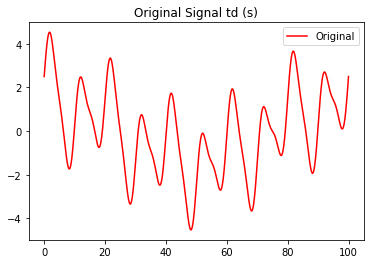

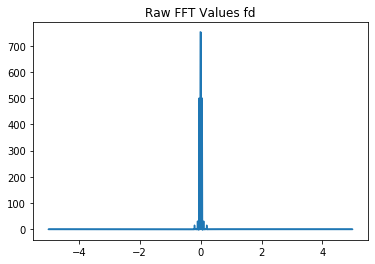

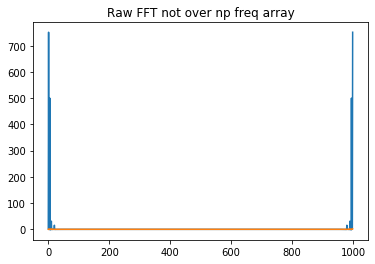

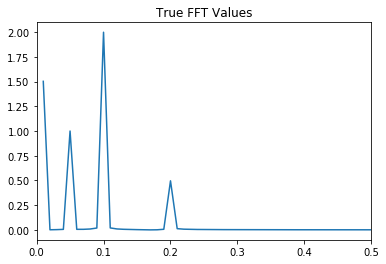

[ 4.95  4.96  4.97  4.98  4.99 -5.   -4.99 -4.98 -4.97 -4.96]


In [26]:
#FFT Numpy Example

##Set up domain

#total number of samples
n = 1000

#td length seconds
Lx = 100

#angular freq of fund frequency (2pi * fundfreq)
ang = 2.0 * np.pi / Lx

##create a signal for td
#instead of dt, third input parameter is number of samples
x = np.linspace(0, Lx, n)
y1 = 1.0*np.cos(5.0*ang*x)
y2 = 2.0*np.sin(10.0*ang*x)
y3 = 0.5*np.sin(20.0*ang*x)
y4 = 1.5*np.cos(ang*x)

#net signal
y = y1+y2+y3+y4

##Prepatory steps
#create all necessary frequencies
#fftfreq returns an array all the FT sample frequencies with input of number of samples
# and kwp d = timestep size
freqs = np.fft.fftfreq(n, d = Lx/n)

#Nyquist freq = sample frequency / 2
#sample frequency was odd, there wouldn't be a nyquist
s_freq = n / Lx
nyq = s_freq / 2

#freq resolution
f_res = 1 / Lx
print("The Nyquist frequency: " + str(nyq) + " The frequency resolution: " + str(f_res))


#mask array for power spectra
#ignores half the values (the complex conjugates)
mask = freqs > 0

##FFT caculation
fft_vals = np.fft.fft(y)

if isinstance(fft_vals[0], complex):
    print('fft is complex')

#true theoretical fft
#What we'd actually get if we computed this theoretically (gets rid of weird raw fft output extraneous freq data)
#multiply by two because ignoring negative frequencies and get original power
fft_theo = 2.0*np.abs(fft_vals/n)

plt.figure(1)
plt.title('Original Signal td (s)')
plt.plot(x, y, color='r', label='Original')
plt.legend()

plt.figure(2)
#plt.plot(freqs, fft_vals, label='Raw fft Values')
plt.plot(freqs, np.real(fft_vals), label='real cast')
plt.title("Raw FFT Values fd")

plt.figure(3)
plt.plot(np.real(fft_vals), label='real portion') #np.real(fft_vals) is the output normally plotted when python casts to real
plt.plot(2.0*np.abs(fft_vals/n), label='np.abs')
#plt.plot(fft_vals, label='Raw fft not over np freqs values')
plt.title("Raw FFT not over np freq array")
#plt.xlim(0, 5)

#Notice how the freq spikes have amplitude matching the signal y amplitudes
plt.figure(4)
plt.plot(freqs[mask], fft_theo[mask], label='True fft Values')
plt.title('True FFT Values')
plt.xlim(0, 0.5)
plt.show()

print(freqs[int(n/2 - 5):int(n/2 + 5)])

It appears that using np.real(fft or iff) removes the casting warning but leaves plot unchanged because python casts the values to real.

Notice how plotting the np.real(raw fft output) changes between graph 2 and 3 - resembles my waveform problem

np.fft.fftfreq gives frequencies ranging from 0 - pos nyquist - neg nyq - 0

plotting in graph two caused a shift


ifft is complex


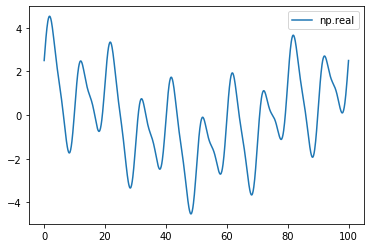

In [20]:
signal_recover = (np.fft.ifft(fft_vals))

if isinstance(signal_recover[0], complex):
    print('ifft output is complex')

plt.plot(x, np.real(signal_recover), label='np.real') #real part of ifft output gives the td signal
#plt.plot(x, signal_recover, label='no np.real')
#plt.plot(x, np.abs(signal_recover), label='np.abs')

#plt.plot(x, np.fft.ifft(fft_theo))

plt.legend()
plt.show()

From tutorial [(x)](https://www.youtube.com/watch?v=twi_KN1mL_E&list=PLNmACol6lYY6vMIuE1Wspug9QYURHltOR&index=34)

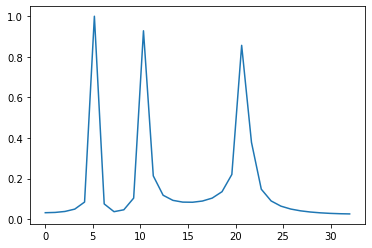

In [12]:
N = 64 #num of points
T = 1/64.0 #spacing between points

x = np.linspace(0, 2*np.pi*N*T, N) #(start, stop, num of samples)
y1 = np.cos(20*x)
y2 = np.sin(10*x)
y3 = np.sin(5*x)

y = y1+y2+y3

fy = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2)) #range from 0 to nyquist freq
#print(fy)

plt.plot(xf, (2.0/N)*np.abs(fy[0:int(N/2)]))
#plt.plot(xf, 2.0*np.abs(fy[0:int(N/2)])/N) #same thing

